In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
import mglearn as mglearn

In [3]:
cd/Users/skygazer/Desktop

[WinError 3] The system cannot find the path specified: '/Users/skygazer/Desktop'
C:\Users\lbmis\Downloads


In [3]:
# Loading the dataset in using Pandas
crabs = pd.read_csv(r'C:\Users\lbmis\OneDrive\Documents\CSCI 5823 - Machine Learning\australian-crabs.csv')
print(crabs.head(n=5))
# I added the column titles in the Excel CSV prior to loading into the notebook, I also changed Blue to 0 and Orange to 1
# in Excel using Find and Replace

   sp   sex  index   FL   RW    CL    CW   BD
0   0  Male      1  8.1  6.7  16.1  19.0  7.0
1   0  Male      2  8.8  7.7  18.1  20.8  7.4
2   0  Male      3  9.2  7.8  19.0  22.4  7.7
3   0  Male      4  9.6  7.9  20.1  23.1  8.2
4   0  Male      5  9.8  8.0  20.3  23.0  8.2


In [4]:
# Finding out the data types and making sure all rows and columns are present
print(crabs.dtypes)
print(crabs.shape)

sp         int64
sex       object
index      int64
FL       float64
RW       float64
CL       float64
CW       float64
BD       float64
dtype: object
(200, 8)


In [5]:
# Creating a new dataset that only has the 5 morphological features (step 2)
new_crabs = crabs[["FL", "RW", "CL", "CW", "BD"]].copy()
print(new_crabs.head(n=10))

     FL    RW    CL    CW    BD
0   8.1   6.7  16.1  19.0   7.0
1   8.8   7.7  18.1  20.8   7.4
2   9.2   7.8  19.0  22.4   7.7
3   9.6   7.9  20.1  23.1   8.2
4   9.8   8.0  20.3  23.0   8.2
5  10.8   9.0  23.0  26.5   9.8
6  11.1   9.9  23.8  27.1   9.8
7  11.6   9.1  24.5  28.4  10.4
8  11.8   9.6  24.2  27.8   9.7
9  11.8  10.5  25.2  29.3  10.3


In [6]:
# Code for k-means clustering model (step 3) and code for returning cluster labels
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(new_crabs)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0, 0.5, 'Feature 1')

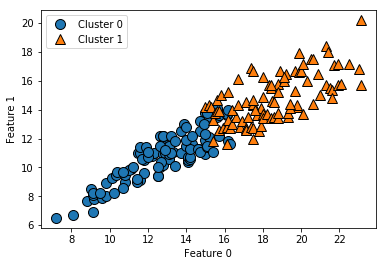

In [7]:
# Creating a scatterplot of the KMeans cluster, to visualize our cluster results using 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(new_crabs)

assignmentkm = kmeans.fit_predict(new_crabs)
mglearn.discrete_scatter(new_crabs.iloc[:, 0], new_crabs.iloc[:, 1], assignmentkm)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [8]:
# Below is code for our agglomerative clustering model (step 4) and code for returning cluster labels
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward

agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(new_crabs)
print("Cluster Memberships:\n", agg.labels_)

Cluster Memberships:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0, 0.5, 'Feature 1')

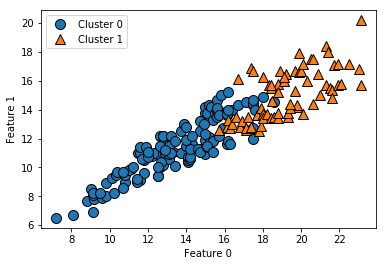

In [9]:
# Creating a scatterplot of agg cluster assignment so we can visualize our cluster results using 2 clusters
import mglearn.plots
agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(new_crabs)
mglearn.discrete_scatter(new_crabs.iloc[:, 0], new_crabs.iloc[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [10]:
# In order to assess the outcome for the agglomerative clustering (step 5), we measure the ARI score using the "sp" column 
# as the ground truth of classes to compare to our clustering labels from new_crabs 
from sklearn.metrics.cluster import adjusted_rand_score
print("ARI Score:\n", adjusted_rand_score(crabs.sp, agg.labels_))

ARI Score:
 0.039680115668042


In [11]:
# displaying ARI Score for K-Means Cluster
from sklearn.metrics.cluster import adjusted_rand_score
print("K-Means Cluster\n ARI Score:\n", adjusted_rand_score(crabs.sp, kmeans.labels_))

K-Means Cluster
 ARI Score:
 0.027520989729375923


In [12]:
# Step 6 - Assesing which clustering algorithm works best
# Between KMeans clustering and agglomerative clustering, it appears that agglomerative performs slightly better with this
# dataset. Neither score was high, or close to 1.0, but we think that's due to the shape of the dataset. We only used the 
# 5 morpholoigical features, and this could have impacted how the algorithms performed. As with unsupervised learning,
# in order to really assess how the algorithms performed, we have to manually inspect the data and output. It's possible
# that the data were clustered based on sex, or size, or other features, as there is no way to tell it we are specifically
# looking for it to assess and group by the species. 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_crabs)
X_scaled = scaler.transform(new_crabs)

In [14]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (200, 5)
Reduced shape: (200, 2)


Text(0, 0.5, 'Second principal component')

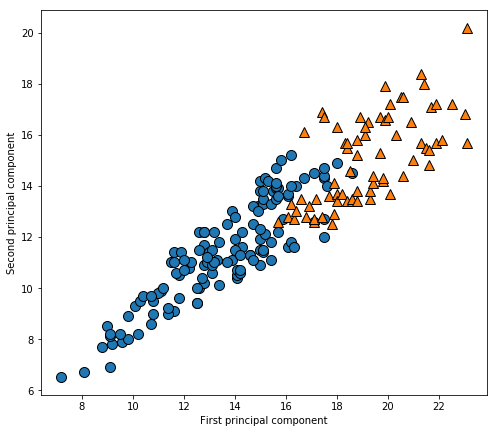

In [15]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(new_crabs.iloc[:, 0], new_crabs.iloc[:, 1], assignment)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")